In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install imbalanced-learn


In [2]:
df1 = pd.read_csv('diabetes_prediction_dataset.csv')
df1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


### Univariate analysis

In [5]:
def univariate_analysis(df, feature):
    counts = df[feature].value_counts()
    # Plot bar chart
    sns.barplot(x=counts.index, y=counts.values)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Univariate Analysis of {feature}')
    plt.show()
    return None

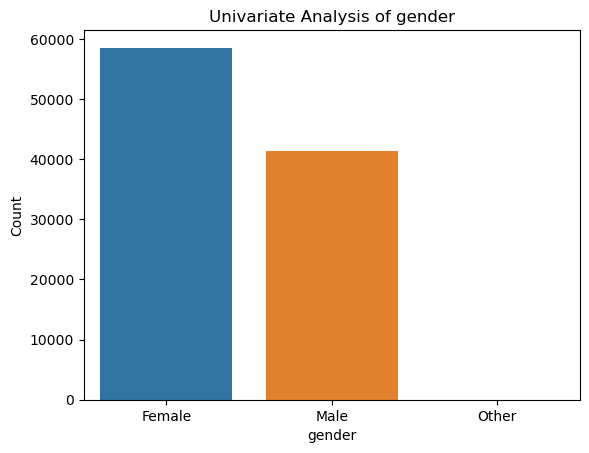

In [6]:
univariate_analysis(df1,'gender')

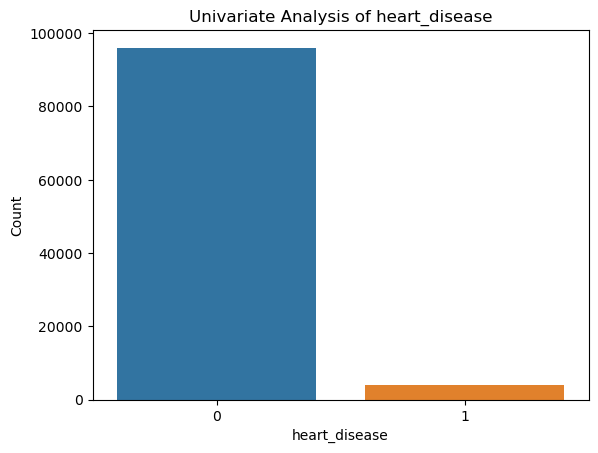

In [7]:
univariate_analysis(df1,'heart_disease')

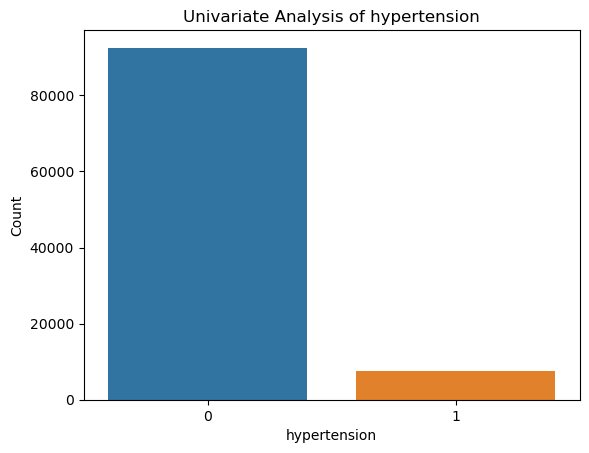

In [8]:
univariate_analysis(df1,'hypertension')

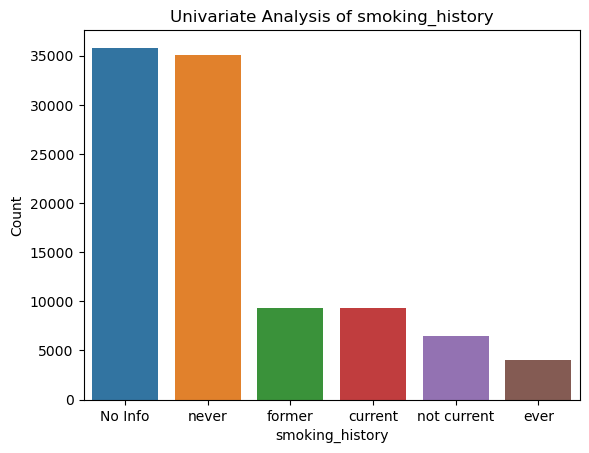

In [9]:
univariate_analysis(df1,'smoking_history')

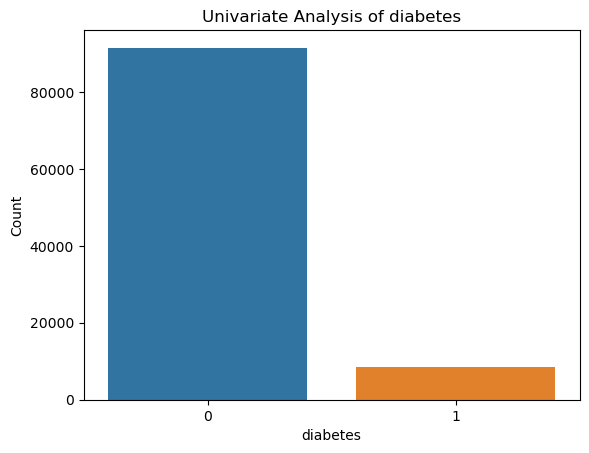

In [10]:
univariate_analysis(df1,'diabetes')

In [11]:
def univariate_analysis1(df, feature, top_n=10):
    # Create bins of size 10 for the continuous variable
    bins = pd.cut(df[feature], bins=10, precision=0, include_lowest=True)
    counts = bins.value_counts().nlargest(top_n)
    
    # Plot bar chart
    sns.barplot(x=counts.index, y=counts.values, order=counts.index)
    plt.xlabel(f'{feature} Bins')
    plt.ylabel('Count')
    plt.title(f'Top {top_n} Univariate Analysis of {feature}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.show()
    return None


In [12]:
# Univariate analysis for continous variables
def univariate_analysis1(df, feature, top_n=10):
    counts = df[feature].value_counts().nlargest(top_n)
    # Plot bar chart
    sns.barplot(x=counts.index, y=counts.values, order=counts.index)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Top {top_n} Univariate Analysis of {feature}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.show()
    return None

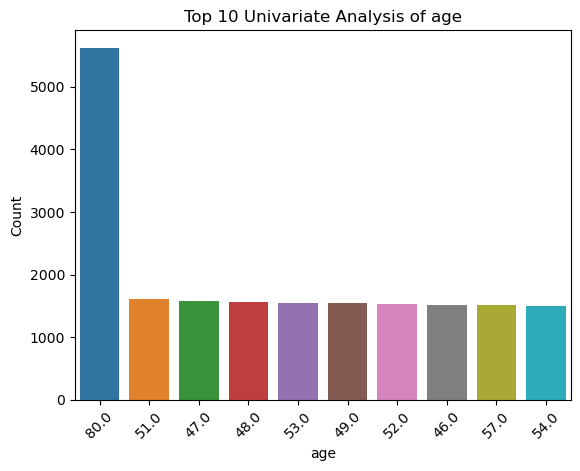

In [13]:
univariate_analysis1(df1,'age')

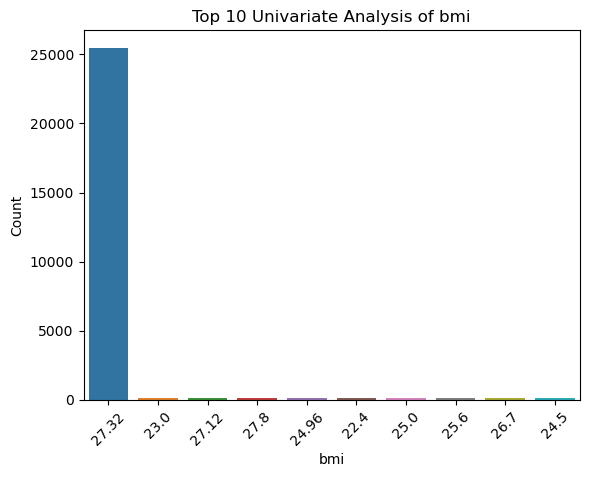

In [14]:
univariate_analysis1(df1,'bmi')

### Bivariate Analysis

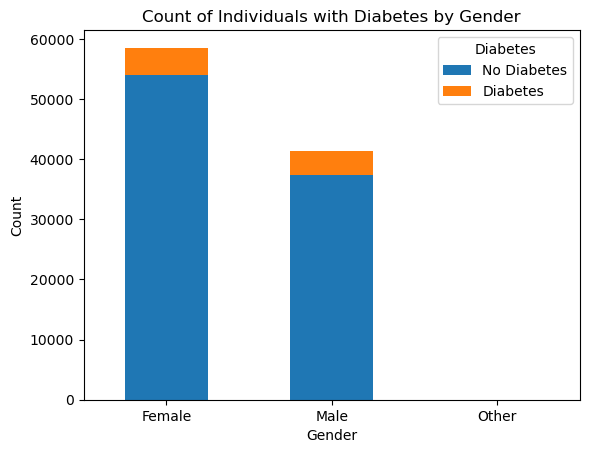

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_diabetes_count_by_features(df, feature):
    # Create a DataFrame containing the counts of diabetes and non-diabetes for each category of the feature
    counts_df = df.groupby([feature, 'diabetes']).size().unstack()

    # Create a stacked bar chart
    counts_df.plot(kind='bar', stacked=True)

    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.title(f'Count of Individuals with Diabetes by {feature.capitalize()}')
    plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])
    plt.xticks(rotation=0)
    plt.show()

# Example usage with your DataFrame 'df1' and the feature 'gender':
plot_diabetes_count_by_features(df1, 'gender')


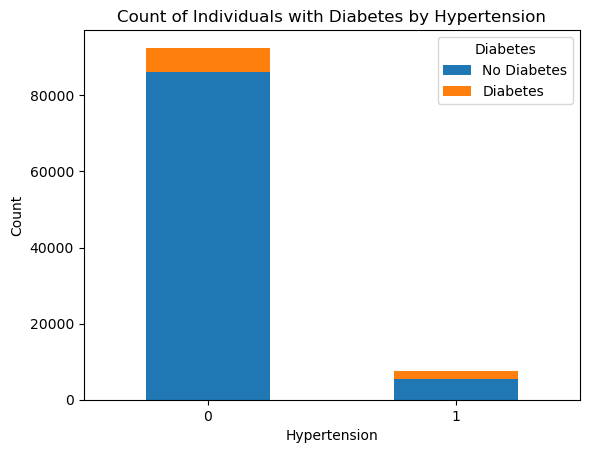

In [16]:
plot_diabetes_count_by_features(df1, 'hypertension')

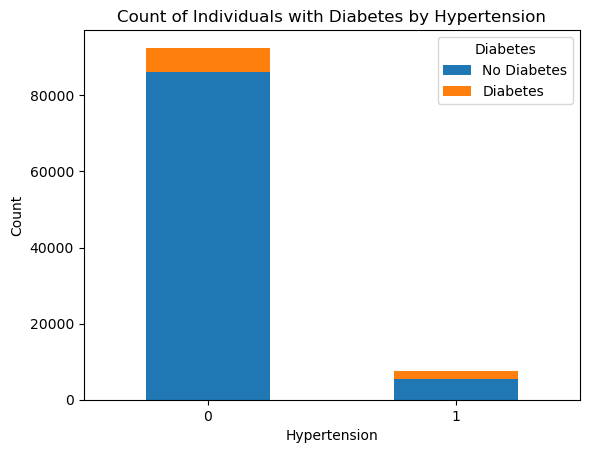

In [17]:
plot_diabetes_count_by_features(df1, 'hypertension')

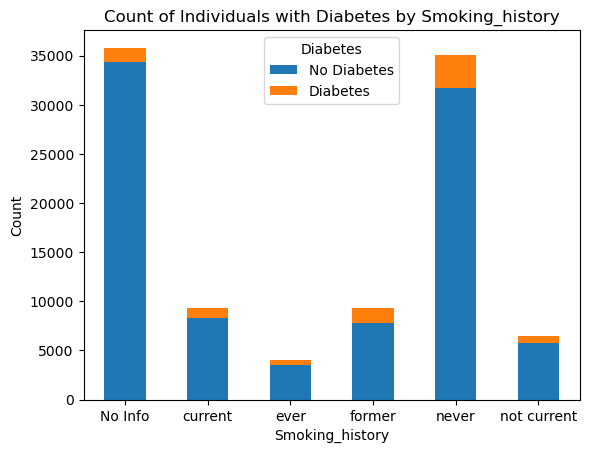

In [18]:
plot_diabetes_count_by_features(df1, 'smoking_history')

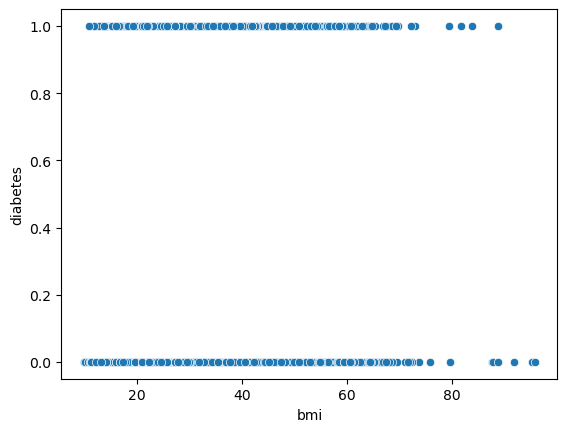

In [19]:
sns.scatterplot(data=df1, x='bmi', y='diabetes' );

# Modeling

In [20]:
# Svm
df1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [21]:
df1['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [22]:
df1.head(12)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [23]:
df1['diabetes'].unique()

array([0, 1], dtype=int64)

In [24]:
df1.groupby('diabetes').mean(numeric_only=True)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,
0,40.115187,0.058984,0.029235,26.887163,5.396761,132.852470
1,60.946588,0.245647,0.149059,31.988382,6.934953,194.094706


In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Creating a copy of the DataFrame to avoid modifying the original data
encoded_df = df1.copy()

# Creating a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'smoking_history' column
encoded_df['encoded_smoking_history'] = label_encoder.fit_transform(encoded_df['smoking_history'])

# Fit and transform the 'gender' column
encoded_df['encoded_gender'] = label_encoder.fit_transform(encoded_df['gender'])

# Display the encoded DataFrame
print(encoded_df)

unique_values = encoded_df[['encoded_smoking_history', 'smoking_history']].drop_duplicates().values
for value in unique_values:
    encoded_smoking_history, smoking_history = value
    print(f"encoded_smoking_history: {encoded_smoking_history}, smoking_history: {smoking_history}")

unique_values = encoded_df[['encoded_gender', 'gender']].drop_duplicates().values
for value in unique_values:
    encoded_gender, gender = value
    print(f"encoded_gender: {encoded_gender}, gender: {gender}")


       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  encoded_smoking_history  \
0              6.6   

In [26]:
# Drop the original 'smoking_history' and 'gender' columns
encoded_df.drop(['smoking_history', 'gender'], axis=1, inplace=True)

# Display the DataFrame after dropping the columns
print(encoded_df)


        age  hypertension  heart_disease    bmi  HbA1c_level  \
0      80.0             0              1  25.19          6.6   
1      54.0             0              0  27.32          6.6   
2      28.0             0              0  27.32          5.7   
3      36.0             0              0  23.45          5.0   
4      76.0             1              1  20.14          4.8   
...     ...           ...            ...    ...          ...   
99995  80.0             0              0  27.32          6.2   
99996   2.0             0              0  17.37          6.5   
99997  66.0             0              0  27.83          5.7   
99998  24.0             0              0  35.42          4.0   
99999  57.0             0              0  22.43          6.6   

       blood_glucose_level  diabetes  encoded_smoking_history  encoded_gender  
0                      140         0                        4               0  
1                       80         0                        0          

In [27]:
# Reordering the dataframe
# Get the list of column names in the original order
original_columns = encoded_df.columns.tolist()

# Define the new column order
new_column_order = [
    'age','hypertension','heart_disease','bmi','HbA1c_level', 'blood_glucose_level','encoded_smoking_history','encoded_gender','diabetes'
]

# Create a new DataFrame with columns rearranged
encoded_df = encoded_df[new_column_order]

# Print the new DataFrame
print(encoded_df)


        age  hypertension  heart_disease    bmi  HbA1c_level  \
0      80.0             0              1  25.19          6.6   
1      54.0             0              0  27.32          6.6   
2      28.0             0              0  27.32          5.7   
3      36.0             0              0  23.45          5.0   
4      76.0             1              1  20.14          4.8   
...     ...           ...            ...    ...          ...   
99995  80.0             0              0  27.32          6.2   
99996   2.0             0              0  17.37          6.5   
99997  66.0             0              0  27.83          5.7   
99998  24.0             0              0  35.42          4.0   
99999  57.0             0              0  22.43          6.6   

       blood_glucose_level  encoded_smoking_history  encoded_gender  diabetes  
0                      140                        4               0         0  
1                       80                        0               0    

In [28]:
# Save the new dataframe in excel format
encoded_df.to_csv('New_diabetes_df.csv', index = True)

In [29]:
encoded_df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,encoded_smoking_history,encoded_gender,diabetes
0,80.0,0,1,25.19,6.6,140,4,0,0
1,54.0,0,0,27.32,6.6,80,0,0,0
2,28.0,0,0,27.32,5.7,158,4,1,0
3,36.0,0,0,23.45,5.0,155,1,0,0
4,76.0,1,1,20.14,4.8,155,1,1,0


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

X = encoded_df.drop('diabetes', axis = 1)# Split the data into training and testing sets
y = encoded_df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features to have zero mean and unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM model with C=1.0 for no regularization
model = SVC(C=1.0, kernel='linear', random_state=42)

# Use cross-validation to estimate model performance
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Train the model on the entire training set
model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
test_accuracy = model.score(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)


Cross-Validation Scores: [0.96      0.9609375 0.9625625 0.9615625 0.9604375]
Mean CV Score: 0.9610999999999998
Test Accuracy: 0.9595


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Balance the dataset using SMOTE
X = encoded_df.drop('diabetes', axis=1)  # Assuming 'diabetes' is the name of your target variable column
y = encoded_df['diabetes']
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Feature scaling (optional but can be beneficial for SGDClassifier)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SGDClassifier model
sgd_classifier = SGDClassifier(loss='hinge', random_state=42)  # Use hinge loss for linear SVM
sgd_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_test_pred = sgd_classifier.predict(X_test_scaled)
y_train_pred = sgd_classifier.predict(X_train_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
classification_report_result = classification_report(y_test, y_test_pred)

print("Test Accuracy:", accuracy)
print("Test Classification Report:\n", classification_report_result)

# Train performance
train_accuracy = accuracy_score(y_train, y_train_pred)
train_classification_report_result = classification_report(y_train, y_train_pred)

print("Train Accuracy:", train_accuracy)
print("Train Classification Report:\n", train_classification_report_result)


Test Accuracy: 0.8858469945355191
Test Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88     27369
           1       0.88      0.89      0.89     27531

    accuracy                           0.89     54900
   macro avg       0.89      0.89      0.89     54900
weighted avg       0.89      0.89      0.89     54900

Train Accuracy: 0.8871975019516003
Train Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89     64131
           1       0.88      0.89      0.89     63969

    accuracy                           0.89    128100
   macro avg       0.89      0.89      0.89    128100
weighted avg       0.89      0.89      0.89    128100



In [32]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a DataFrame called 'df' with features and the target variable 'diabetes'
X = encoded_df.drop('diabetes', axis=1)
y = encoded_df['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate SMOTE and RandomUnderSampler
smote = SMOTE(random_state=42)
under_sampler = RandomUnderSampler(random_state=42)

# Apply SMOTE to oversample the minority class
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Apply RandomUnderSampler to undersample the majority class
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train_resampled, y_train_resampled)

# Initialize and train the SGDClassifier model
sgd_classifier = SGDClassifier(loss='hinge', random_state=42)  # Use hinge loss for linear SVM
sgd_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = sgd_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)


Accuracy: 0.8822666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93     27453
           1       0.41      0.86      0.55      2547

    accuracy                           0.88     30000
   macro avg       0.70      0.87      0.74     30000
weighted avg       0.94      0.88      0.90     30000



### Predictive System

In [33]:
import numpy as np

# Sample input data for prediction
input_data = np.array([53.0,0,0,27.32,7.0,159,3,0]).reshape(1, -1)

# Standardize the input data using the same scaler used during training
input_data_scaled = scaler.transform(input_data)

# Make prediction using the trained SVM model
prediction = sgd_classifier.predict(input_data_scaled)

# Check the predicted class and output the result
if prediction[0] == 0:
    print('The person does not have diabetes.')
else:
    print('The person has diabetes.')


The person does not have diabetes.


C:\Users\NAOMI\anaconda3\envs\test\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


##### Saving trained model

In [41]:
import pickle


In [47]:
filename = 'trained_model'
pickle.dump(sgd_classifier, open(filename, 'wb'))

In [48]:
# Load the save model
loaded_model = pickle.load(open('trained_model', 'rb'))

In [49]:
# Save the scaler to a file
scaler_filename = 'scaler'
pickle.dump(scaler, open(scaler_filename, 'wb'))

In [50]:
# Load scaler
load_scaler = pickle.load(open('scaler', 'rb'))

In [52]:
# Sample input data for prediction
input_data = np.array([77.0,0,0,31.7,6.5,280,4,0]).reshape(1, -1)

# Standardize the input data using the same scaler used during training
input_data_scaled = scaler.transform(input_data)

# Make prediction using the trained SVM model
prediction = sgd_classifier.predict(input_data_scaled)

# Check the predicted class and output the result
if prediction[0] == 0:
    print('The person does not have diabetes.')
else:
    print('The person has diabetes.')


The person does not have diabetes.


C:\Users\NAOMI\anaconda3\envs\test\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\NAOMI\anaconda3\envs\test\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


### Deployment

In [40]:
# 